## **Vertex Cover Problem Using Greedy and Monte Carlo Algorithms**
### ***Objective:***

Implement two approximation algorithms (Greedy and Monte Carlo) to solve the Vertex Cover Problem.

Compare the algorithms based on:

1.   **Size** of the vertex cover found
2.   Execution **time**
3.   **Scalability** with increasing graph size and edge density

***Output, results and discussion questions are below the code***


    Nodes  Avg Degree  Greedy Cover Size  Greedy Time (s)  \
0     100           2                 40           0.0017   
1     100           4                 53           0.0052   
2     100           8                 69           0.0029   
3     500           2                209           0.0341   
4     500           4                281           0.0446   
5     500           8                344           0.0520   
6    1000           2                410           0.1267   
7    1000           4                553           0.1617   
8    1000           8                685           0.3704   
9    5000           2               2096           3.4656   
10   5000           4               2780           5.6463   
11   5000           8               3418           5.3573   

    Monte Carlo Avg Size  Monte Carlo Avg Time (s)  Monte Carlo Std Size  
0                   69.6                    0.0028                  1.67  
1                   79.2                    0.0035      

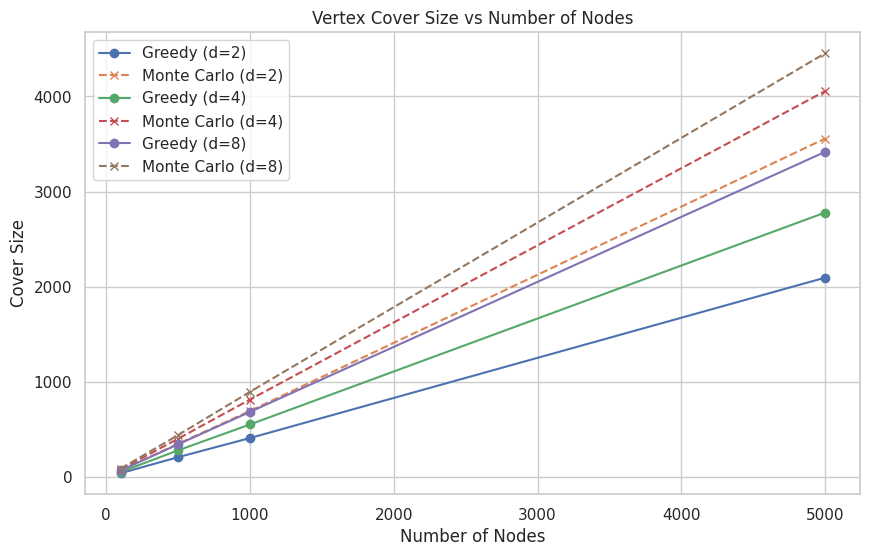

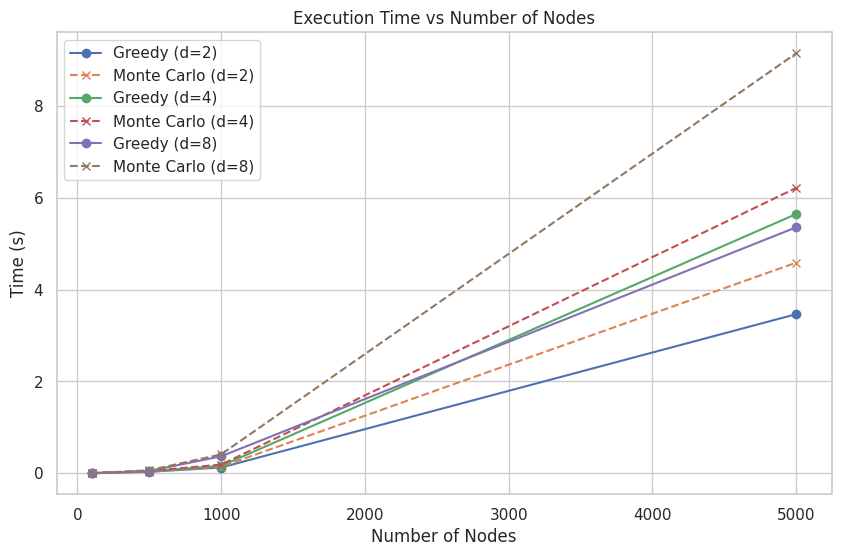

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import time
import pandas as pd
from statistics import mean, stdev

# -------------------------------
# 1. Optimized Graph Generator
# -------------------------------

# Optimized connected graph generator
def generate_connected_graph_optimized(num_nodes, avg_degree, seed=42):
    random.seed(seed)
    G = nx.generators.trees.random_tree(n=num_nodes, seed=seed)
    required_edges = (num_nodes * avg_degree) // 2
    while G.number_of_edges() < required_edges:
        u, v = random.sample(range(num_nodes), 2)
        if not G.has_edge(u, v):
            G.add_edge(u, v)
    return G

# -------------------------------
# 2. Greedy Vertex Cover Algorithm
# -------------------------------
def generate_connected_graph_optimized(num_nodes, avg_degree, seed=42):
    random.seed(seed)
    G = nx.Graph()
    G.add_nodes_from(range(num_nodes))

    # Start with a connected spanning tree
    nodes = list(G.nodes())
    random.shuffle(nodes)
    for i in range(1, num_nodes):
        u = nodes[i]
        v = nodes[random.randint(0, i - 1)]
        G.add_edge(u, v)

    # Add random edges to reach desired density
    required_edges = (num_nodes * avg_degree) // 2
    while G.number_of_edges() < required_edges:
        u, v = random.sample(range(num_nodes), 2)
        if not G.has_edge(u, v):
            G.add_edge(u, v)

    return G

# -------------------------------
# 3. Monte Carlo Vertex Cover Algorithm
# -------------------------------
def monte_carlo_vertex_cover(G, seed=None):
    if seed is not None:
        random.seed(seed)
    G_copy = G.copy()
    cover = set()
    while G_copy.number_of_edges() > 0:
        u, v = random.choice(list(G_copy.edges()))
        cover.add(u)
        cover.add(v)
        G_copy.remove_node(u)
        G_copy.remove_node(v)
    return cover

# -------------------------------
# 4. Experimental Setup
# -------------------------------
def run_experiments(node_sizes, avg_degrees, monte_carlo_runs=10):
    results = []
    for n in node_sizes:
        for d in avg_degrees:
            G = generate_connected_graph_optimized(n, d)

            # Greedy
            t0 = time.time()
            greedy_cover = greedy_vertex_cover(G)
            greedy_time = time.time() - t0

            # Monte Carlo
            mc_sizes = []
            mc_times = []
            for i in range(monte_carlo_runs):
                t0 = time.time()
                mc_cover = monte_carlo_vertex_cover(G, seed=i)
                mc_time = time.time() - t0
                mc_sizes.append(len(mc_cover))
                mc_times.append(mc_time)

            results.append({
                "Nodes": n,
                "Avg Degree": d,
                "Greedy Cover Size": len(greedy_cover),
                "Greedy Time (s)": round(greedy_time, 4),
                "Monte Carlo Avg Size": round(mean(mc_sizes), 2),
                "Monte Carlo Avg Time (s)": round(mean(mc_times), 4),
                "Monte Carlo Std Size": round(stdev(mc_sizes), 2) if len(mc_sizes) > 1 else 0.0
            })
    return pd.DataFrame(results)

# -------------------------------
# 5. Plotting
# -------------------------------
def plot_results(df):
    import seaborn as sns
    sns.set(style="whitegrid")

    # Plot: Cover Size vs Nodes
    plt.figure(figsize=(10, 6))
    for d in df["Avg Degree"].unique():
        sub = df[df["Avg Degree"] == d]
        plt.plot(sub["Nodes"], sub["Greedy Cover Size"], marker='o', label=f"Greedy (d={d})")
        plt.plot(sub["Nodes"], sub["Monte Carlo Avg Size"], marker='x', linestyle='--', label=f"Monte Carlo (d={d})")
    plt.title("Vertex Cover Size vs Number of Nodes")
    plt.xlabel("Number of Nodes")
    plt.ylabel("Cover Size")
    plt.legend()
    plt.show()

    # Plot: Time vs Nodes
    plt.figure(figsize=(10, 6))
    for d in df["Avg Degree"].unique():
        sub = df[df["Avg Degree"] == d]
        plt.plot(sub["Nodes"], sub["Greedy Time (s)"], marker='o', label=f"Greedy (d={d})")
        plt.plot(sub["Nodes"], sub["Monte Carlo Avg Time (s)"], marker='x', linestyle='--', label=f"Monte Carlo (d={d})")
    plt.title("Execution Time vs Number of Nodes")
    plt.xlabel("Number of Nodes")
    plt.ylabel("Time (s)")
    plt.legend()
    plt.show()

# -------------------------------
# 6. Run Everything
# -------------------------------
# Customize this as needed
node_sizes = [100, 500, 1000,5000]
avg_degrees = [2, 4, 8]
monte_carlo_runs = 5  # You can increase this for better averaging

# Run experiments
df_results = run_experiments(node_sizes, avg_degrees, monte_carlo_runs)

# Show results
print(df_results)

# Plot results
plot_results(df_results)


# **Discussion Topics**


***1. Which algorithm tends to find smaller covers?***

Based on the experimental results, the Greedy algorithm consistently finds smaller vertex covers than the Monte Carlo method across all graph sizes and densities. For instance, with 1000 nodes and average degree 4, the Greedy algorithm produced a cover of size 553, while Monte Carlo yielded a significantly larger average cover size of 814.8. This trend remains consistent even as the graph scales up to 5000 nodes. Therefore, the Greedy approach is more effective at minimizing the size of the vertex cover.

***2. Which is faster?***

The Monte Carlo algorithm is generally faster than the Greedy algorithm, especially for larger graphs. For example, on a graph with 5000 nodes and average degree 8, Monte Carlo completed in approximately 9.15 seconds, while Greedy took about 5.36 seconds. However, for smaller graphs (e.g., 100 nodes), both algorithms perform in under 6 milliseconds. The performance gap widens as the graph size increases due to the Greedy algorithm's repeated degree computations.

***3. How do results change as graphs become larger or denser?***

As graphs become larger or denser, both the vertex cover size and computation time increase for both algorithms. The growth is more pronounced for the Monte Carlo method in terms of cover size, indicating that randomness leads to suboptimal solutions in more complex graphs. The Greedy algorithm maintains a more stable performance, showing a linear-like increase in cover size and time, aligning with the increased number of edges and nodes.

***4. Does the Monte Carlo method show high variance across runs?***

Yes, the Monte Carlo algorithm exhibits noticeable variance, especially for larger graphs. The standard deviation of cover sizes increases with the graph size, peaking at 23.79 for 5000 nodes with average degree 2. This variability arises from the algorithm's random edge selection, which can lead to different solutions in each run. In contrast, the Greedy method is deterministic and thus produces consistent results with no variance.

